## 10-1 대통령 연설문 텍스트 마이닝

1. 텍스트 마이닝(text mining) : 문자로 된 데이터로 부터 가치있는 정보를 얻어내는 기법
- 형태소 분석(morphology analysis) : 텍스트 마이닝의 첫 번째 작업으로, 문자를 구성하는 어절의 품사를 파악
- 형태소 분석을 통해 어절의 품사를 파악한 다음 명사, 동사, 형용사 등의 의미를 지닌 품사를 추출하여 얼마나 많이 사용되었는지 확인
- 텍스트 마이닝을 이용하여 SNS나 웹사이트에 올라온 글을 분석할 수 있음

### Lab 1 : KoNLPy 패키지(한글 텍스트 형태소 분석) 설치하기 - 실습용 PC에는 설치되어 있음

1. 자바 설치 - 자바가 먼저 설치 되어 있어야 함

2. KoNLPy 의존성 패키지 설치하기
- 의존성 패키지 : 다른 패키지의 기능을 이용하는 경우, 다른 패키지를 먼저 설치해야 작동
- pip install jpype1 설치

3. KoNLPy 설치 하기
- pip install konlpy
- KoNLPy(“코엔엘파이”라고 읽습니다)는 한국어 정보처리를 위한 파이썬 패키지

4. NLP란 무엇인가요?
- NLP (Natural Language Processing, 자연어처리)는 텍스트에서 의미있는 정보를 분석, 추출하고 이해하는 일련의 기술집합입니다.
- 품사 태깅 은 형태소의 뜻과 문맥을 고려하여 그것에 마크업을 하는 일
> 가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN
- KoNLPy를 설치하면 다음의 4개 형태소 분석기를 사용 가능 : Kkma(꼬꼬마),Komoran,Hannanum(한나눔),Okt (previous Twitter)
     - Hannanum(한나눔) : 정제된 텍스트에 사용하는 형태소 분석기
     - Kkma(꼬꼬마) : 띄어쓰기 오류에 덜 민감하여 댓글 분석에 많이 이용하는 형태소 분석기

- 형태소 : 
     - 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위
     - 문법적·관계적인 뜻만을 나타내는 단어 또는 단어의 부분.

## Lab 2 : 가장 많이 사용된 단어 알아보기
- 문재인 대통령 대선 출마 선언문을 사용한 텍스트 마이닝
- 문법 오류가 없는 정제된 문장으로 전처리 작업이 많지 않은 텍스트

1. 연설문 불러오기

In [ ]:
moon = open('speech_moon.txt', encoding = 'UTF-8').read()
moon

2. 불필요한 문자 제거하기
- 특수문자, 한자 등, 한글이 아닌 문자를 제거
- re.sub()를 활용하여 한글이 아닌 모든 문자를 공백으로 변경

In [ ]:
# 불필요한 문자 제거
import re

In [ ]:
moon = re.sub('[^가-힣]', ' ', moon)  # 두번째 파라미터가 공백 문자임에 주의
moon

3. 명사 추출하기
- 문장에서 명사만을 추출하여 분석해 보자

In [ ]:
# hannanum 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()

In [ ]:
# 형태소와 종류까지 추출하기 (N 명사, J 조사 등)
hannanum.pos("대한민국의 영토는 한반도와 그 부속도서로 한다")

In [ ]:
# 형태소 종류 알파벳의 의미 확인
hannanum.tagset

In [ ]:
# 명사 추출하기
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

In [ ]:
# 형태소 단위로 추출하기
hannanum.morphs("대한민국의 영토는 한반도와 그 부속도서로 한다")

In [ ]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(moon)
nouns[:20]

In [ ]:
# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame( {'word' : nouns})
df_word

4. 단어 빈도표 만들기

In [ ]:
# 글자 수(count) 파생 변수 추가
df_word['word_n'] = df_word['word'].str.len()
df_word

In [ ]:
# 단어 중 2글자 이상의 단어만 남기기
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')

In [ ]:
# 단어 빈도 구하기
df_word = df_word.groupby('word', as_index=False) \
                .agg(n = ('word', 'count')) \
                .sort_values('n', ascending=False)
df_word

5. 단어 빈도 그래프 만들기

In [ ]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

In [ ]:
# 막대 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update( {'font.family' : 'malgun Gothic',  # 한글 폰트
                      'figure.dpi' : '120',             # 해상도
                      'figure.figsize' : [6.5, 6]})     # 가호, 세로 크기

sns.barplot(data=top20, y='word', x='n')

- '일자리', '복지국가' 등의 단어 구성으로 일자리 문제를 해결하고 복지국가를 지향하겠다는 의사를 표현했다는 것을 알 수 있음

## Lab 3 : 워드 클라우드 만들기
- 워드 클라우드(word cloud)는 단어의 빈도를 구름 모양으로 표현한 그래프
- 어떤 단어가 얼마나 사용됬는지 파악하기 쉽다.

1. wordcloud 패키지 설치

In [ ]:
!pip install wordcloud

2. 한글 폰트 설정하기
- 워드 클라우드에 한글을 표현하려면 한글 폰트를 사용하도록 설정해야 함
- 배달의 민족 도현체 폰트 설치

In [ ]:
font = 'DoHyeon-Regular.ttf'

3. 단어와 빈도를 담은 딕셔너리 만들기
- 워드 클라우드는 딕셔너리 자료구조를 활용하여 만듬
- df_word는 데이터 프레임으로 딕셔너리로 변환하여 사용

In [ ]:
df_word.head()

In [ ]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

4. 워드 클라우드 만들기

In [ ]:
from wordcloud import WordCloud

In [ ]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정, 항상 같은 모양으로 생성
                font_path = font,           # 폰트 설정
                width = 400,                # 가로 크기
                height = 400,               # 세로 크기
                background_color = 'white') # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
plt.figure(figsize = (5, 5))            # 액자 사이즈
plt.axis('off')                         # 테두리 선 없애기
plt.imshow(img_wordcloud)

## Lab 4 : 워드 클라우드 모양 바꾸기
- WordCloud()의 mask를 이용하여 워드 클라우드(word cloud) 모양을 바꿀 수 있음


1. mask 만들기
- PIL(Python Imaging Library) : 이미지 분석 및 처리를 쉽게할 수 있는 라이브러리
- 픽셀 단위 조작
- 마스킹 및 투명도 제어
- 흐림, 윤곽 보정, 윤곽 검출 등 이미지 필터
- 선명도, 밝기, 명암 보장 등 화상 조정
- 이미지에 텍스트 추가하기

In [ ]:
import PIL

In [ ]:
# 구름 이미지 불러오기, 배경이 투명해야 함
# 구름 모양의 이미지 경계가 뚜렸한 png 파일
# 마스크가 될 이미지 파일 불러오기
icon = PIL.Image.open('cloud.png')   

In [ ]:
print(f'이미지 파일 이름 : {icon.filename}')
print(f'이미지 파일 형식 : {icon.format}')
print(f'이미지 파일 크기 : {icon.size}')
print(f'이미지 색상 모드 : {icon.mode}')
print(f'이미지 가로 크기 : {icon.width}')
print(f'이미지 세로 크기 : {icon.height}')

In [ ]:
icon.show()

2. 워드 클라우드 만들기

In [ ]:
# 구름 이미지로 mask 만들기
import numpy as np

# 흰색 캠퍼스 만들기
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))

# 흰색 캠퍼스 이미지(0,0)에 icon 이미지(첫번째 파라미터)를 부착함
# icon 이미지(두번째 파라미터)를 mask 이미지로 사용함
img.paste(icon, icon)

# mask 파일 생성
img = np.array(img)

In [ ]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              contour_width=3,                  # 테두리 굵기
              contour_color='steelblue',        # 테두리 색
              background_color = 'white',
              mask = img)                      # 배경으로 사용할 이미지

# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## Lab 5 : 워드 클라우드 색깔 바꾸기
- inferno 컬러맵 적용

In [ ]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white',
              mask = img,
              colormap = 'inferno')      # 컬러맵 설정

In [ ]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## 10-2 기사 댓글 텍스트 마이닝
- 2020년 9월 21일 방탄소년단이 '빌보드 핫 100 차트' 1위에 오른 소식을 다룬 네이버 뉴스 댓글 분석

## Lab 6 : 가장 많이 사용된 단어 알아보기

1. 기사 댓글 불러오기

In [ ]:
# 데이터 불러오기
# naver 뉴스 댓글 파일
import pandas as pd
df = pd.read_csv('news_comment_BTS.csv', encoding='UTF-8')

In [ ]:
df.head()

In [ ]:
# 데이터 살펴보기
df.info()

2. 불필요한 문자 제거하기
- 댓글(reply)에서 불필요한 문자 제거

In [ ]:
# 불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex=True)
df['reply'].head()

3. 명사 추출하기
- 꼬꼬마(Kkma) 형태 분석기 사용
- 꼬꼬마 형태소 분석기는 띄어쓰기 오류가 있는 문장에서도 형태소를 잘 출력
- 댓글 처럼 정제되지 않은 텍스트 분석시 적합

In [ ]:
# Kkma 만들기
import konlpy
kkma = konlpy.tag.Kkma()

In [ ]:
# 꼬꼬마 형태소 분석기로 명사 추출
nouns = df['reply'].apply(kkma.nouns)
nouns

4. 단어 빈도표 만들기
- 꼬꼬마 형태소 분석기는 행마다 여러 단어가 리스트 자료 구조에 들어감
- df.explode()로 한 행에 한 단어만 들어가도록 함

In [ ]:
nouns = nouns.explode()
nouns

> 두 글자 이상 단어만 남기기

In [ ]:
# 데이터 프레임 만들기
type(nouns)

In [ ]:
df_word = pd.DataFrame({'word' : nouns})
df_word.head()

In [ ]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()
df_word.head()

In [ ]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.head()

In [ ]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index=False) \
                .agg(n = ('word', 'count')) \
                .sort_values('n', ascending=False)
df_word

5. 단어 빈도 막대 그래프 만들기

In [ ]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

In [ ]:
# 가로 세로 크기 결정
plt.rcParams.update({'figure.figsize' : [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data=top20, y='word', x='n')

- 출력된 그래프를 보면 '방탄', '축하', '자랑', ' 국위선양', '대한민국' 등 단어 빈도 높음
- 칭찬 댓글이 많음을 알 수 있음
- 군대, 연제, 군면제 등 단어도 많아 BTS 병역의무 면제에 대한 댓글도 많음

## Lab 7 : 워드 클라우드 만들기

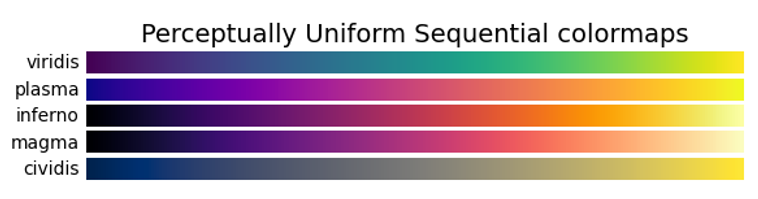

칼라맵의 종류 확인   https://bit.ly/easypy_104

In [ ]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']

In [ ]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white',
              mask = img,
              colormap = 'inferno')

In [ ]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## 실습과제 : 대한민국 헌법 데이터를 읽고, 
- 단어 빈도 막대 그래프 만들기
- 워드 클라우드 만들기

In [ ]:
import re
import pandas as pd

# KoNLPy에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공
from konlpy.corpus import kolaw

In [ ]:
# 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있음
kolaw.fileids()

In [ ]:
# 대한 민국 헌법 읽어 오기
law = kolaw.open('constitution.txt').read()
law[:100]

In [ ]:
# Okt(Open Korean Text) 만들기
# Twitter에서 만든 한국어 처리기 Twitter-korean-text를 활용하여 만든 한국어 형태소 분석기
from konlpy.tag import Okt 
okt = Okt()

In [ ]:
len(law)

In [ ]:
# 특수 문자, 숫자 등 삭제


In [ ]:
len(law)

In [ ]:
# 헌법에서 명사 추출하기
# hannanum 만들기
nouns = okt.nouns(law)
len(nouns)

In [ ]:
nouns[:30]

In [ ]:
# 1글자로 된 명사는 삭제


In [ ]:
# 단어의 빈도표를 상위 20개 단어에 대해 막대 그래프로 그리시오


In [ ]:
# wordCloud를 그려보세요


In [ ]:
# 다양한 wordCloud mask image를 가저와 적용해 보세요
# WordCloud mask image 검색
